In [5]:
import numpy as np
import matplotlib.pyplot as plt

Estimate the probability that x*y < 0.5 x and y are uniformly distributed in [0,1]

The area where x*y < 0.5 is the region below the hyperbola y = 0.5/x

The total area of the unit square is 1, so the probability is the area under the curve from x=0 to x=1, which is the integral of 0.5/x from 0 to 1

This integral diverges at x=0, but since we are in the unit square, we only consider x in (0,1]

The area can be computed as the integral from 0 to 1 of 0.5/x dx = 0.5 * ln(1) - 0.5 * ln(0) which is undefined, but we can compute the area numerically by Monte Carlo simulation

In [6]:
rng = np.random.default_rng(42)
N = 100_000
x = rng.random(N)
y = rng.random(N)

In [7]:
prod = x * y
estimate = (prod < 0.5).mean()
std_error = np.sqrt(estimate * (1 - estimate) / N)

Монте-Карло оцінка (N=100000): 0.84705000 ± 0.00113823 (стандартна похибка)


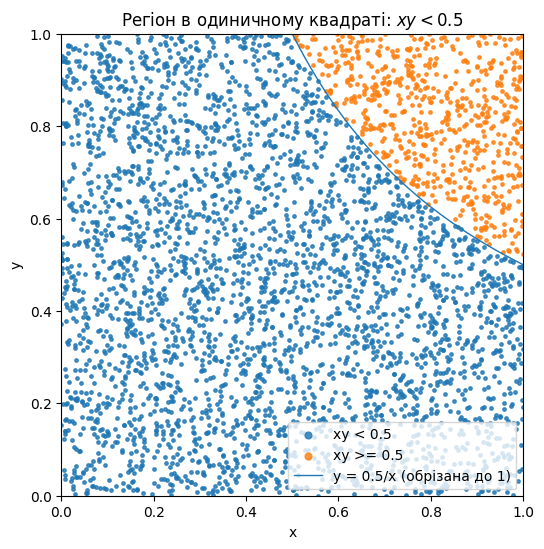

In [8]:
print(f"Монте-Карло оцінка (N={N}): {estimate:.8f} ± {std_error:.8f} (стандартна похибка)")

plt.figure(figsize=(6,6))
subset = 4000
inds = rng.choice(N, subset, replace=False)
x_s = x[inds]
y_s = y[inds]
mask = x_s * y_s < 0.5
plt.scatter(x_s[mask], y_s[mask], s=6, label='xy < 0.5', alpha=0.8)
plt.scatter(x_s[~mask], y_s[~mask], s=6, label='xy >= 0.5', alpha=0.8)
xs = np.linspace(0.001, 1, 400)
ys = 0.5 / xs
ys_clipped = np.minimum(ys, 1.0)
plt.plot(xs, ys_clipped, linewidth=1, label='y = 0.5/x (обрізана до 1)')

plt.xlim(0,1)
plt.ylim(0,1)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Регіон в одиничному квадраті: $xy < 0.5$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(markerscale=2)
plt.show()